# **Proyecto 3** | Análisis Comparativo de Modelos de Regresión y Clasificación

### Link del Repositorio

* https://github.com/paulabaal12/PROY3-DM

### Integrantes del equipo
- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel) 
- [Juan Pablo Solís - 22102](https://github.com/JPS4321)

## **Propuesta Inicial**

### Planteamiento del Problema

bla bla bla bla

### Metodología Propuesta

bla bla bla bla

### Resultados Esperados

bla bla bla bla

## **Análisis Exploratorio de Datos**

### Importar las librerías a utilizar

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import LabelEncoder
import json
pd.options.display.max_columns = None

### Importar datos

Primero se importan los datos en data frames individuales para analizar los campos de cada archivo antes de juntarlos

In [572]:
data_path = 'data/'
df_lists = []

customers_df = pd.read_csv(data_path + 'olist_customers_dataset.csv')
geolocation_df = pd.read_csv(data_path + 'olist_geolocation_dataset.csv')
order_items_df = pd.read_csv(data_path + 'olist_order_items_dataset.csv')
order_payments_df = pd.read_csv(data_path + 'olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv(data_path + 'olist_order_reviews_dataset.csv')
orders_df = pd.read_csv(data_path + 'olist_orders_dataset.csv')
products_df = pd.read_csv(data_path + 'olist_products_dataset.csv')
sellers_df = pd.read_csv(data_path + 'olist_sellers_dataset.csv')
category_translation_df = pd.read_csv(data_path + 'product_category_name_translation.csv')

df_lists.append(customers_df)
df_lists.append(geolocation_df)
df_lists.append(order_items_df)
df_lists.append(order_payments_df)
df_lists.append(order_reviews_df)
df_lists.append(orders_df)
df_lists.append(products_df)
df_lists.append(sellers_df)
df_lists.append(category_translation_df)

df_names = ['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'products', 'sellers', 'category_translation']

### Obtener información de los data frames

In [573]:
for name, data in zip(df_names, df_lists):
    print(f"--- {name.upper()} ---")
    
    print("-> DIMENSIONS:", data.shape)
    print("-> COLUMNS:", data.columns.to_list())
    print("\nINFO:")
    print(data.info())
    print("\nDESCRIPTIVE STATISTICS:")
    print(data.describe())
    print("\nNULL VALUES:")
    print(data.isnull().sum())
    print("\nUNIQUE VALUES:")
    print(data.nunique())
    print("\n============================\n\n")


--- CUSTOMERS ---
-> DIMENSIONS: (99441, 5)
-> COLUMNS: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

DESCRIPTIVE STATISTICS:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max           

### Resumen de Calidad de Datos por Dataset


#### **CUSTOMERS**
- No hay valores nulos.
- `customer_zip_code_prefix` parece limpio 
- `customer_state` tiene 27 estados únicos.
- No requiere limpieza urgente.

---

#### **GEOLOCATION**
- No hay valores nulos.
- `geolocation_lat` y `geolocation_lng` tienen mucha variabilidad.
- **Nota:** Este dataset no tiene un ID único por fila. Es redundante y opcional de unir.

---

####  **ORDER_ITEMS**
- No hay valores nulos.
- Columna `price`: mínimo de **0.85** y máximo **6735** — revisar si precios bajos son válidos.
- Columna `freight_value`: algunos valores de **0** — posibles envíos gratis?, no parece error grave.
- `order_item_id` tiene valores de 1 a 21 (número de ítems en el pedido).

---

#### **ORDER_PAYMENTS**
- No hay valores nulos.
- `payment_type` es categórica → necesita codificación en el preprocesamiento.
- `payment_value` tiene valores de 0 (posibles errores o pedidos cancelados, revisar más adelante) y max de 13,664.

---

####  **ORDER_REVIEWS**
- Grandes cantidades de valores nulos en:
  - `review_comment_title` (~88% nulo)
  - `review_comment_message` (~58% nulo)
- `review_score` está completo.
- **Nota:** Las columnas de comentario podrían ser eliminadas o tratadas aparte si no son necesarias.

---

#### **ORDERS**
- Valores nulos en:
  - `order_approved_at` (~160 nulos)
  - `order_delivered_carrier_date` (~1783 nulos)
  - `order_delivered_customer_date` (~2965 nulos)
- Podrían ser pedidos no aprobados o cancelados.
- `order_status` es categórica → necesita codificación.

---

#### **PRODUCTS**
- 610 valores nulos en:
  - `product_category_name`
  - `product_name_lenght`
  - `product_description_lenght`
  - `product_photos_qty`
- Solo 2 valores nulos en dimensiones físicas (`weight`, `height`, `length`, `width`). Posiblemente se necesite normalizar los valores.
- Algunos pesos (`product_weight_g`) son **0** — posibles errores (productos mal registrados).

---

#### **SELLERS**
- No hay valores nulos.
- `seller_city` y `seller_state` son categóricas → necesitan codificación.

---

####  **CATEGORY_TRANSLATION**
- No hay valores nulos.
- Traduce las categorías de producto de portugués a inglés.
- Será útil unirlo con `products` en el preprocesamiento.

---

### **Notas Generales:**
- Las variables categóricas (`payment_type`, `order_status`, `seller_state`, etc.) necesitarán codificación.
- Se detectaron columnas con muchos nulos (`review_comment_title`, `review_comment_message`), que pueden ser descartadas o tratadas aparte.
- Algunos datasets como `geolocation` no tienen identificadores únicos y podrían no ser utilizados directamente.


### Obtener las columnas de los datasets

In [574]:
j = 0
for i in df_lists:
    print(f"{df_names[j]} -> columnas: {i.columns.to_list()}")
    j+=1

customers -> columnas: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
geolocation -> columnas: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
order_items -> columnas: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
order_payments -> columnas: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
order_reviews -> columnas: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
orders -> columnas: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
products -> columnas: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_le

En el análisis inicial de las columnas de los datasets se puede observar que:

- `customers` contiene información sobre los clientes, identificados por `customer_id` y `customer_unique_id`.
- `geolocation` proporciona coordenadas de ubicación basadas en códigos postales (`geolocation_zip_code_prefix`), pero no tiene un identificador único para clientes o pedidos.
- `order_items` conecta pedidos (`order_id`) con productos (`product_id`) y vendedores (`seller_id`).
- `order_payments` proporciona detalles de los métodos de pago por `order_id`.
- `order_reviews` almacena reseñas de clientes, ligadas a `order_id`.
- `orders` describe la orden en sí (estado, fechas de entrega, etc.), usando `order_id`.
- `products` ofrece información detallada sobre productos, con `product_id`.
- `sellers` almacena información sobre los vendedores, usando `seller_id`.
- `category_translation` traduce los nombres de categorías de productos del portugués al inglés, conectándose por `product_category_name`.

Para futuros análisis y modelado, será necesario realizar **joins** utilizando las siguientes claves principales:
- `order_id` para unir `orders`, `order_payments`, `order_reviews`, y `order_items`.
- `product_id` para unir `order_items` con `products`.
- `seller_id` para unir `order_items` con `sellers`.
- `customer_id` para unir `orders` con `customers`.
- `product_category_name` para unir `products` con `category_translation`.


Estos *joins* permitirán consolidar información relevante de clientes, pedidos, productos y vendedores para el análisis de predicción y clasificación posterior.


### Resúmenes Estadísticos de los datos

#### **Distribución de precios de productos**

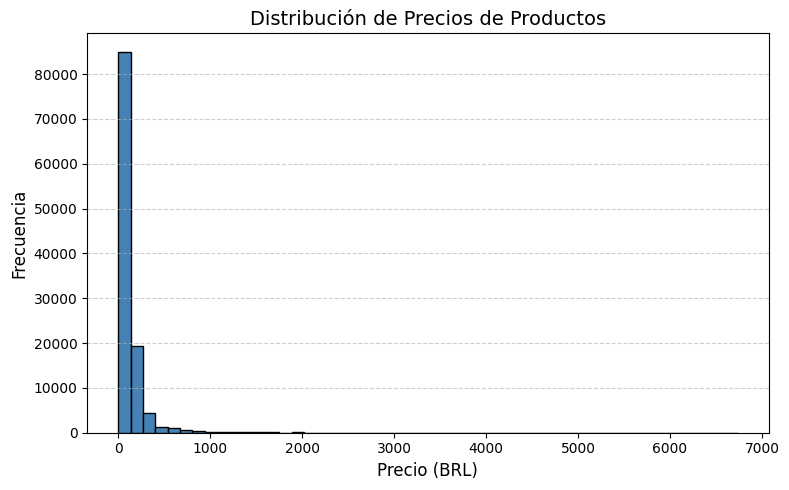

In [575]:
# Histograma de precios de productos
plt.figure(figsize=(8,5))
plt.hist(order_items_df['price'], bins=50, color='steelblue', edgecolor='black')
plt.title('Distribución de Precios de Productos', fontsize=14)
plt.xlabel('Precio (BRL)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


La mayoría de los productos tienen precios bajos, concentrados principalmente entre 0 y 500 reales brasileños (BRL). Se observa una alta frecuencia de productos con precios pequeños, lo que sugiere que la plataforma maneja principalmente artículos de bajo costo.

Sin embargo, existen productos con precios significativamente más altos, evidenciados por la larga cola a la derecha del histograma. Estos precios extremos representan outliers y podrían corresponder a productos de lujo o de categorías especiales.

#### **Distribución de valores de pago**

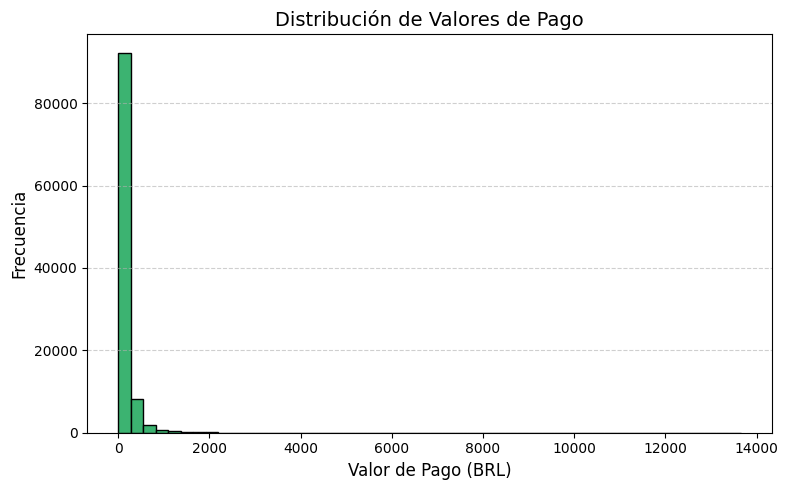

In [576]:
# Histograma de valores de pago
plt.figure(figsize=(8,5))
plt.hist(order_payments_df['payment_value'], bins=50, color='mediumseagreen', edgecolor='black')
plt.title('Distribución de Valores de Pago', fontsize=14)
plt.xlabel('Valor de Pago (BRL)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

La mayoría de los valores de pago están concentrados en montos bajos, principalmente por debajo de los 500 BRL. Esto refleja que la mayoría de las transacciones en la plataforma processed involucran pagos accesibles para los usuarios.

Al igual que con los precios de productos, se observan algunos pagos significativamente altos, aunque representan una proporción mínima del total. Estos outliers podrían estar asociados a compras de productos de alto valor o múltiples productos en un solo pedido.

### Visualización de Patrones Clave

#### **Distribución de métodos de pago**

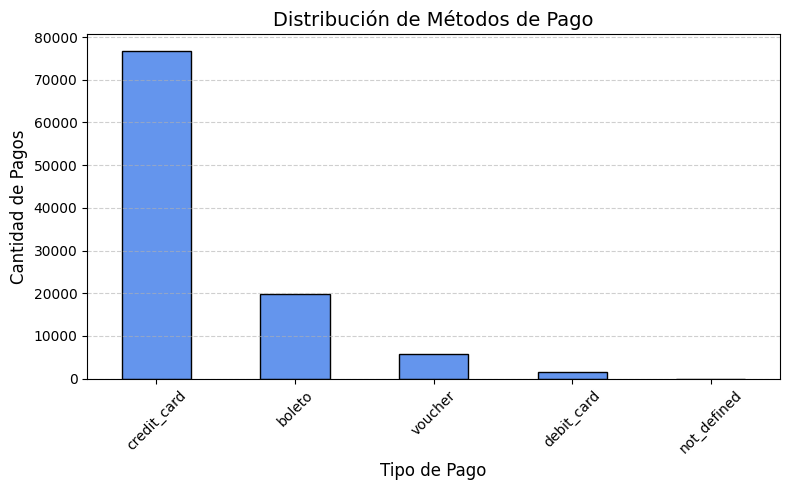

In [577]:
# Tipos de Pago
order_payments_df['payment_type'].value_counts().plot(kind='bar', color='cornflowerblue', edgecolor='black', figsize=(8,5))
plt.title('Distribución de Métodos de Pago', fontsize=14)
plt.xlabel('Tipo de Pago', fontsize=12)
plt.ylabel('Cantidad de Pagos', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

La mayoría de los clientes prefieren utilizar tarjeta de crédito como método de pago en la plataforma Olist, seguida por boleto bancario y voucher. Esto sugiere que los usuarios tienen una alta preferencia por métodos de pago electrónicos rápidos y seguros. Los métodos menos utilizados son tarjeta de débito y opciones no definidas, lo cual indica que otras formas de pago tienen una participación marginal en el total de las transacciones.

#### **Distribución de estados de órdenes**

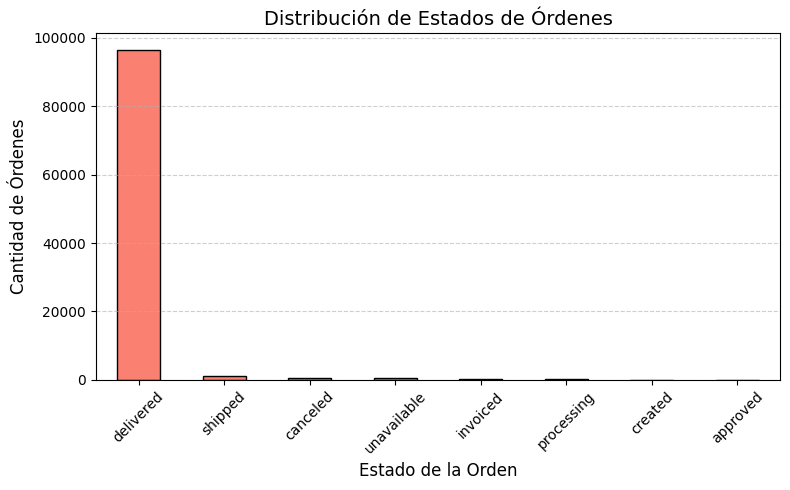

In [578]:
# Estados de las órdenes
orders_df['order_status'].value_counts().plot(kind='bar', color='salmon', edgecolor='black', figsize=(8,5))
plt.title('Distribución de Estados de Órdenes', fontsize=14)
plt.xlabel('Estado de la Orden', fontsize=12)
plt.ylabel('Cantidad de Órdenes', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


La mayoría de las órdenes en la plataforma se encuentran en estado "delivered" (entregado), indicando un proceso de venta exitoso y cumplimiento en las entregas. Sin embargo, también se observan algunas órdenes en estado "canceled" (cancelado) y "unavailable" (no disponible), lo que sugiere oportunidades de mejora en la gestión de inventario y atención al cliente para reducir el porcentaje de pedidos no completados.  

Los estados como "shipped", "processing" y "invoiced" representan etapas intermedias dentro del flujo de procesamiento de pedidos.


#### **Distribución de calificaciones de clientes**

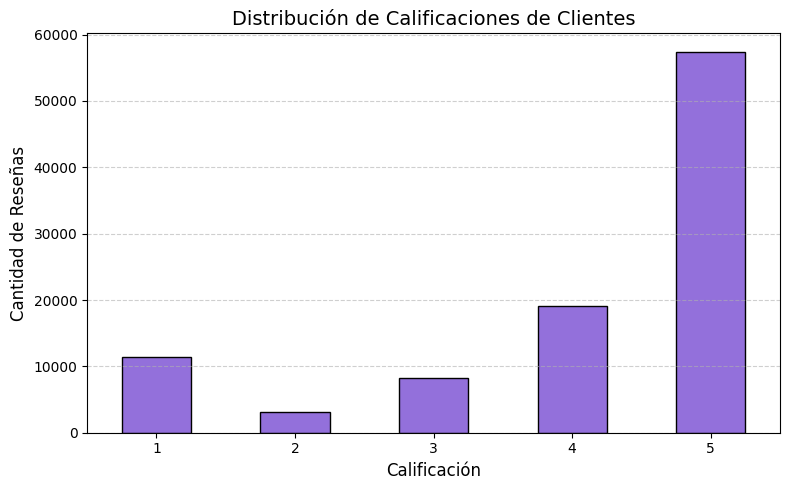

In [579]:
# Calificaciones de reseñas
order_reviews_df['review_score'].value_counts().sort_index().plot(kind='bar', color='mediumpurple', edgecolor='black', figsize=(8,5))
plt.title('Distribución de Calificaciones de Clientes', fontsize=14)
plt.xlabel('Calificación', fontsize=12)
plt.ylabel('Cantidad de Reseñas', fontsize=12)
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

La mayoría de los clientes otorgan calificaciones de 5 estrellas, indicando un alto nivel de satisfacción con los productos y servicios recibidos. Sin embargo, también se observa una cantidad significativa de calificaciones de 1 estrella, lo que refleja que existe un grupo de clientes que tuvo experiencias negativas. Además, la distribución muestra que las opiniones tienden a ser polarizadas, concentrándose principalmente en los extremos de satisfacción (1 y 5 estrellas).

### Limpieza de datos

In [580]:
from scipy import stats


def detect_outliers(df, column, method='zscore', threshold=3):
    
    if column not in df.columns or not np.issubdtype(df[column].dtype, np.number):
        return pd.Series(False, index=df.index)
    
    if method == 'zscore':
        z_scores = np.abs(stats.zscore(df[column].dropna()))
        outliers = pd.Series(False, index=df.index)
        outliers[df[column].dropna().index] = z_scores > threshold
        return outliers
    
    elif method == 'iqr':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        return (df[column] < lower_bound) | (df[column] > upper_bound)
    
    else:
        raise ValueError("Método no reconocido. Use 'zscore' o 'iqr'.")

def clean_dataframe(df, name):
    print(f"\n--- LIMPIEZA DE {name.upper()} ---")
    
    # Copia para no modificar el original
    df_clean = df.copy()
    changes = {}
    
    #Verificar duplicados
    n_duplicates = df_clean.duplicated().sum()
    if n_duplicates > 0:
        df_clean = df_clean.drop_duplicates()
        changes['duplicados_eliminados'] = n_duplicates
        print(f"- Se eliminaron {n_duplicates} filas duplicadas")
    
    # Convertir columnas de fechas a datetime
    date_columns = [col for col in df_clean.columns if any(date_term in col.lower() 
                                                         for date_term in ['date', 'time', '_at'])]
    for col in date_columns:
        if df_clean[col].dtype == object:
            try:
                df_clean[col] = pd.to_datetime(df_clean[col])
                changes[f'tipo_{col}'] = 'convertido a datetime'
                print(f"- Columna '{col}' convertida a datetime")
            except:
                pass
    
    # manejo de  valores extremos en columnas numéricas
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        # Solo buscar outliers en columnas que no sean IDs o códigos
        if not any(id_term in col.lower() for id_term in ['id', 'code', 'zip', 'encoded']):
            outliers = detect_outliers(df_clean, col, method='iqr')
            n_outliers = outliers.sum()
            
            if n_outliers > 0 and n_outliers < len(df_clean) * 0.05:  # Si hay menos del 5% de outliers
                #recortar (clipping)
                Q1 = df_clean[col].quantile(0.01)  # Percentil 1%
                Q3 = df_clean[col].quantile(0.99)  # Percentil 99%
                
                orig_min = df_clean[col].min()
                orig_max = df_clean[col].max()
                
                # Aplicar recorte
                df_clean[col] = df_clean[col].clip(Q1, Q3)
                
                changes[f'outliers_{col}'] = f'{n_outliers} valores recortados (min: {orig_min:.2f} → {Q1:.2f}, max: {orig_max:.2f} → {Q3:.2f})'
                print(f"- Columna '{col}': {n_outliers} outliers recortados a percentiles 1-99%")
    

### Dataset preprocesado

### Manejo de valores nulos

In [581]:
# Manejo de valores nulos en el dataset 'products_df'
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median())
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median())
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].median())
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].median())
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].median())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].median())

# Manejo de valores nulos para orders
orders_df['order_status_detailed'] = orders_df['order_status']
orders_df.loc[orders_df['order_approved_at'].isnull(), 'order_status_detailed'] = 'pending_approval'
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(pd.NaT)
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(pd.NaT)
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(pd.NaT)

# Manejo de valores nulos para order reviews
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('No Title')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('No Comment')


In [582]:
# verificación de  columnas con valores nulos para cada DataFrame
for name, df in zip(df_names, df_lists):
    null_columns = df.columns[df.isnull().any()].tolist()
    if null_columns:
        print(f"{name} -> Columnas con valores nulos: {null_columns}")
    else:
        print(f"{name} -> No tiene valores nulos.")

# Tabla products_df
print("Tabla: products_df")
print(products_df[['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g']].head())

# Tabla orders_df
print("\nTabla: orders_df")
print(orders_df[['order_id', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_status']].head())

# Tabla order_reviews_df
print("\nTabla: order_reviews_df")
print(order_reviews_df[['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message']].head())

customers -> No tiene valores nulos.
geolocation -> No tiene valores nulos.
order_items -> No tiene valores nulos.
order_payments -> No tiene valores nulos.
order_reviews -> No tiene valores nulos.
orders -> Columnas con valores nulos: ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
products -> No tiene valores nulos.
sellers -> No tiene valores nulos.
category_translation -> No tiene valores nulos.
Tabla: products_df
   product_category_name  product_name_lenght  product_description_lenght  \
0             perfumaria                 40.0                       287.0   
1                  artes                 44.0                       276.0   
2          esporte_lazer                 46.0                       250.0   
3                  bebes                 27.0                       261.0   
4  utilidades_domesticas                 37.0                       402.0   

   product_photos_qty  product_weight_g  
0                 1.0             

### Codificación de variables categóricas

In [583]:
def apply_label_encoding(df, column, return_mapping=False):
    if column not in df.columns or df[column].isnull().all():
        if return_mapping:
            return df, None
        return df

    le = LabelEncoder()
    df_copy = df.copy()

    temp_col = df_copy[column].fillna('MISSING')
    le.fit(temp_col)
    df_copy[column] = le.transform(temp_col)

    if return_mapping:
        mapping = dict(zip(le.classes_, range(len(le.classes_))))
        return df_copy, mapping

    return df_copy


# Función  para one-hot encoding
def apply_onehot_encoding(df, column, max_categories=15):
    if column not in df.columns:
        return df

    df_copy = df.copy()
    n_unique = df_copy[column].nunique()

    if n_unique <= max_categories:
        dummies = pd.get_dummies(df_copy[column], prefix=column, dummy_na=df_copy[column].isnull().any())
        df_copy = pd.concat([df_copy, dummies], axis=1)
        df_copy.drop(column, axis=1, inplace=True)
        print(f"One-hot encoding aplicado a '{column}' ({n_unique} categorías).")
    else:
        print(f"Advertencia: '{column}' tiene {n_unique} categorías, superando el límite de {max_categories}.")
    
    return df_copy

encoding_mappings = {}

# aplicación de codificación a customers_df
customers_df, state_mapping = apply_label_encoding(customers_df, 'customer_state', return_mapping=True)
encoding_mappings['customer_state'] = state_mapping
print("\nLabel Encoding para customer_state:")
print(f"Mapeo: {state_mapping}")

# Codificación selectiva para city (si tiene muchas categorías)
if customers_df['customer_city'].nunique() <= 15:
    customers_df = apply_onehot_encoding(customers_df, 'customer_city')
else:
    customers_df, city_mapping = apply_label_encoding(customers_df, 'customer_city', return_mapping=True)
    encoding_mappings['customer_city'] = city_mapping
    print(f"Label Encoding aplicado a customer_city ({customers_df['customer_city'].nunique()} categorías).")

# Codificación para sellers_df
sellers_df, seller_state_mapping = apply_label_encoding(sellers_df, 'seller_state', return_mapping=True)
encoding_mappings['seller_state'] = seller_state_mapping
print("\nLabel Encoding para seller_state:")
print(f"Mapeo: {seller_state_mapping}")

# Codificación para sellers_city (evaluar la cantidad de categorías)
if sellers_df['seller_city'].nunique() <= 15:
    sellers_df = apply_onehot_encoding(sellers_df, 'seller_city')
else:
    sellers_df = apply_label_encoding(sellers_df, 'seller_city')
    print(f"Label Encoding aplicado a seller_city ({sellers_df['seller_city'].nunique()} categorías).")

# Codificación para orders_df - usar one-hot para order_status (pocas categorías)
orders_df = apply_onehot_encoding(orders_df, 'order_status')
orders_df = apply_onehot_encoding(orders_df, 'order_status_detailed')

# Codificación para order_payments_df
order_payments_df = apply_onehot_encoding(order_payments_df, 'payment_type')

# Codificación para categorías de productos
# Primero unir con la traducción
products_with_categories = pd.merge(products_df, category_translation_df, on='product_category_name', how='left')
products_with_categories['product_category_name_english'] = products_with_categories['product_category_name_english'].fillna('unknown')

# Aplicar label encoding a la categoría en inglés
products_with_categories, category_mapping = apply_label_encoding(
    products_with_categories, 'product_category_name_english', return_mapping=True)
encoding_mappings['product_category_name_english'] = category_mapping

print("\nLabel Encoding para product_category_name_english:")
print(f"Primeras 5 categorías): {dict(list(category_mapping.items())[:5])}")


Label Encoding para customer_state:
Mapeo: {'AC': 0, 'AL': 1, 'AM': 2, 'AP': 3, 'BA': 4, 'CE': 5, 'DF': 6, 'ES': 7, 'GO': 8, 'MA': 9, 'MG': 10, 'MS': 11, 'MT': 12, 'PA': 13, 'PB': 14, 'PE': 15, 'PI': 16, 'PR': 17, 'RJ': 18, 'RN': 19, 'RO': 20, 'RR': 21, 'RS': 22, 'SC': 23, 'SE': 24, 'SP': 25, 'TO': 26}
Label Encoding aplicado a customer_city (4119 categorías).

Label Encoding para seller_state:
Mapeo: {'AC': 0, 'AM': 1, 'BA': 2, 'CE': 3, 'DF': 4, 'ES': 5, 'GO': 6, 'MA': 7, 'MG': 8, 'MS': 9, 'MT': 10, 'PA': 11, 'PB': 12, 'PE': 13, 'PI': 14, 'PR': 15, 'RJ': 16, 'RN': 17, 'RO': 18, 'RS': 19, 'SC': 20, 'SE': 21, 'SP': 22}
Label Encoding aplicado a seller_city (611 categorías).
One-hot encoding aplicado a 'order_status' (8 categorías).
One-hot encoding aplicado a 'order_status_detailed' (8 categorías).
One-hot encoding aplicado a 'payment_type' (5 categorías).

Label Encoding para product_category_name_english:
Primeras 5 categorías): {'agro_industry_and_commerce': 0, 'air_conditioning': 1

In [584]:
def replace_ids(dataframes, id_columns, mapping_dicts, additional_columns=None):
    if additional_columns is None:
        additional_columns = []

    for df in dataframes:
        for column in id_columns.union(additional_columns):
            if column in df.columns:
                # Crear un mapeo único para la columna si no existe
                if column not in mapping_dicts:
                    unique_ids = df[column].unique()
                    mapping_dicts[column] = {old_id: new_id for new_id, old_id in enumerate(unique_ids, start=1)}
                
                # Reemplazar los IDs largos con los IDs simplificados
                df[column] = df[column].map(mapping_dicts[column])
                print(f"IDs en '{column}' reemplazados con IDs simplificados.")
    return dataframes

# Identificar columnas que terminan en '_id' en los DataFrames
id_columns = set()
for df in df_lists:
    id_columns.update([col for col in df.columns if col.endswith('_id')])

# Agregar columnas adicionales que quieras modificar
additional_columns = {'customer_zip_code_prefix', 'customer_city', 'customer_state'}

# Crear un diccionario para almacenar los mapeos de IDs
id_mappings = {}

# Aplicar la función a los DataFrames
df_lists = replace_ids(df_lists, id_columns, id_mappings, additional_columns)

# Verificar los resultados
for name, df in zip(df_names, df_lists):
    print(f"\n{name.upper()} DataFrame:")
    print(df.head())

IDs en 'customer_state' reemplazados con IDs simplificados.
IDs en 'customer_zip_code_prefix' reemplazados con IDs simplificados.
IDs en 'customer_id' reemplazados con IDs simplificados.
IDs en 'customer_city' reemplazados con IDs simplificados.
IDs en 'customer_unique_id' reemplazados con IDs simplificados.
IDs en 'order_id' reemplazados con IDs simplificados.
IDs en 'order_item_id' reemplazados con IDs simplificados.
IDs en 'seller_id' reemplazados con IDs simplificados.
IDs en 'product_id' reemplazados con IDs simplificados.
IDs en 'order_id' reemplazados con IDs simplificados.
IDs en 'order_id' reemplazados con IDs simplificados.
IDs en 'review_id' reemplazados con IDs simplificados.
IDs en 'order_id' reemplazados con IDs simplificados.
IDs en 'customer_id' reemplazados con IDs simplificados.
IDs en 'product_id' reemplazados con IDs simplificados.
IDs en 'seller_id' reemplazados con IDs simplificados.

CUSTOMERS DataFrame:
   customer_id  customer_unique_id  customer_zip_code_prefi

### Visualizar correlaciones

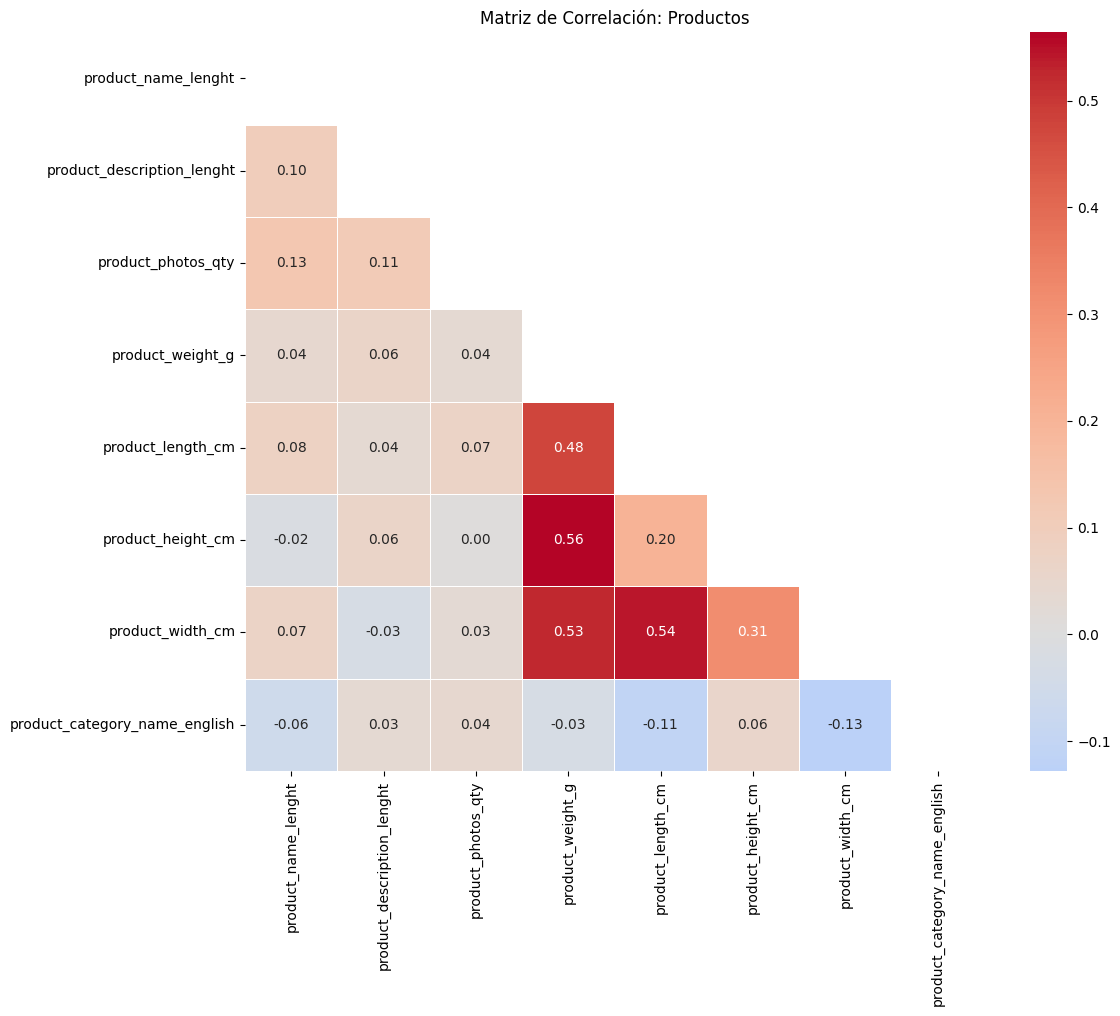

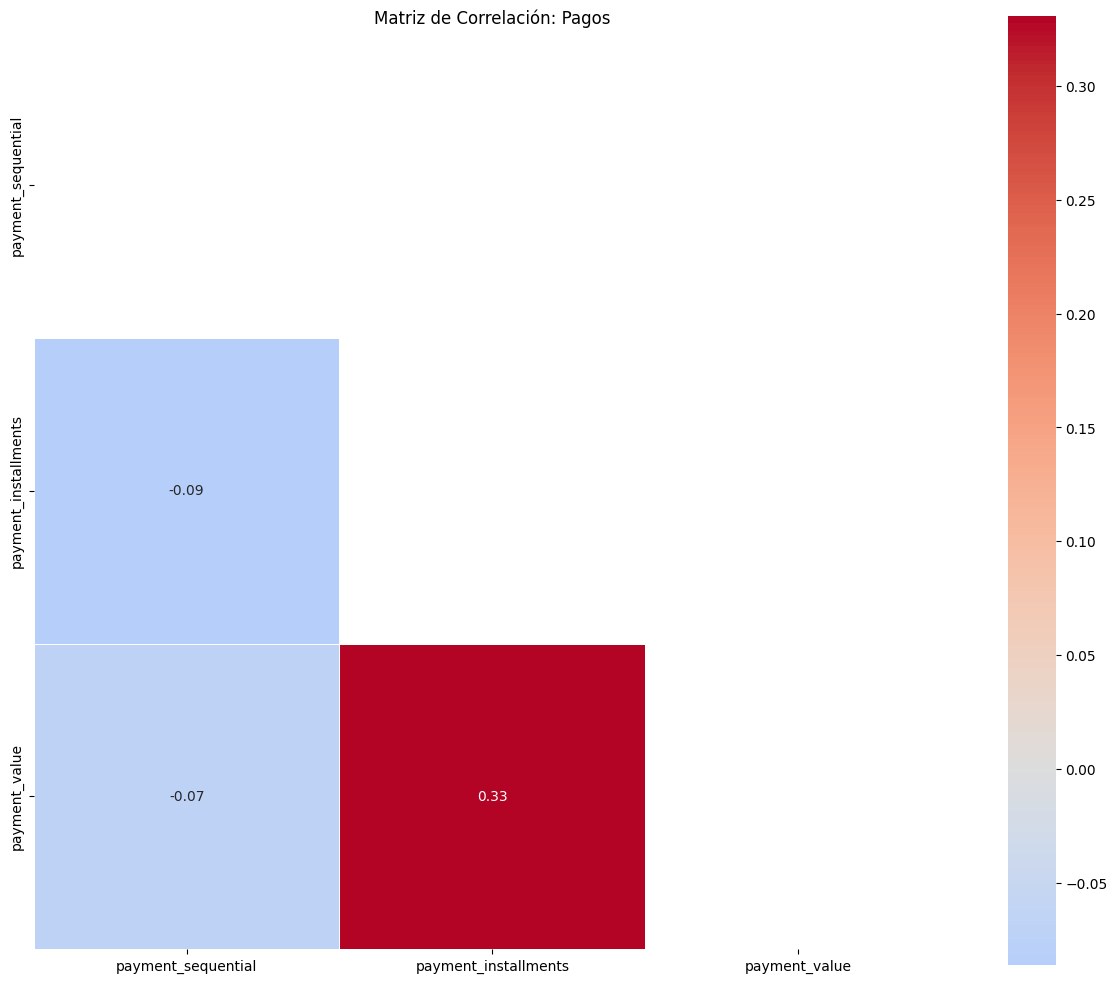

In [585]:
import seaborn as sns

def correlation(df, title, cols=None, figsize=(12, 10)):
    if cols is None:
        # Seleccionar solo columnas numéricas
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    else:
        numeric_cols = [col for col in cols if col in df.columns and np.issubdtype(df[col].dtype, np.number)]
    
    if len(numeric_cols) < 2:
        print(f"No hay suficientes columnas numéricas para calcular correlaciones en {title}")
        return
    
    # Calcular correlación
    corr_matrix = df[numeric_cols].corr()
    
    # Visualizar
    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0, annot=True, fmt=".2f", square=True, linewidths=.5)
    plt.title(f'Matriz de Correlación: {title}')
    plt.tight_layout()
    plt.show()

# Análisis de correlación para products_df
product_numeric_cols = ['product_name_lenght', 'product_description_lenght', 
                        'product_photos_qty', 'product_weight_g', 'product_length_cm', 
                        'product_height_cm', 'product_width_cm', 'product_category_name_english']
correlation(products_with_categories, 'Productos', cols=product_numeric_cols)

# Análisis de correlación para order_payments_df
payment_numeric_cols = ['payment_sequential', 'payment_installments', 'payment_value'] + \
                      [col for col in order_payments_df.columns if col.startswith('payment_type_')]
correlation(order_payments_df, 'Pagos', cols=payment_numeric_cols)

In [586]:

def ids(df, id_column, prefix, start_index=1):

    # Verificar si la columna existe
    if id_column not in df.columns:
        print(f"Advertencia: La columna {id_column} no existe en el DataFrame")
        return df, {}
    
    # Obtener IDs únicos
    unique_ids = df[id_column].unique()
    
    # Crear mapeo
    id_mapping = {old_id: f"{prefix}{i}" for i, old_id in enumerate(unique_ids, start_index)}
    
    # Reemplazar directamente los IDs originales con los legibles
    df_copy = df.copy()
    df_copy[id_column] = df_copy[id_column].map(id_mapping)
    
    return df_copy, id_mapping

In [587]:
# Eliminar columnas innecesarias
if 'customer_unique_id' in customers_df.columns:
    customers_df = customers_df.drop(columns=['customer_unique_id'])
    print("Columna 'customer_unique_id' eliminada del DataFrame de clientes.")

# Generar IDs legibles para las entidades principales
customers_df, customer_id_mapping = ids(customers_df, 'customer_id', 'CUS_')
print(f"Creados {len(customer_id_mapping)} IDs de clientes legibles.")

sellers_df, seller_id_mapping = ids(sellers_df, 'seller_id', 'SEL_')
print(f"Creados {len(seller_id_mapping)} IDs de vendedores legibles.")

products_with_categories, product_id_mapping = ids(products_with_categories, 'product_id', 'PRO_')
print(f"Creados {len(product_id_mapping)} IDs de productos legibles.")

orders_df, order_id_mapping = ids(orders_df, 'order_id', 'ORD_')
print(f"Creados {len(order_id_mapping)} IDs de órdenes legibles.")

# Actualiza customer_id en orders_df
if 'customer_id' in orders_df.columns:
    orders_df['customer_id'] = orders_df['customer_id'].map(lambda x: customer_id_mapping.get(x, x))

# Actualiza claves foráneas en order_items_df
print("\nActualizando IDs en tablas relacionadas...")
if 'order_id' in order_items_df.columns:
    order_items_df['order_id'] = order_items_df['order_id'].map(lambda x: order_id_mapping.get(x, x))
if 'product_id' in order_items_df.columns:
    order_items_df['product_id'] = order_items_df['product_id'].map(lambda x: product_id_mapping.get(x, x))
if 'seller_id' in order_items_df.columns:
    order_items_df['seller_id'] = order_items_df['seller_id'].map(lambda x: seller_id_mapping.get(x, x))

# Actualiza claves foráneas en order_payments_df
if 'order_id' in order_payments_df.columns:
    order_payments_df['order_id'] = order_payments_df['order_id'].map(lambda x: order_id_mapping.get(x, x))

# Manejo de order_reviews_df
if 'order_id' in order_reviews_df.columns:
    order_reviews_df['order_id'] = order_reviews_df['order_id'].astype(str)
    mask_nan = order_reviews_df['order_id'].isin(['nan', 'None', '']) | order_reviews_df['order_id'].str.lower().isin(['nan', 'none'])
    order_reviews_df.loc[mask_nan, 'order_id'] = 'unknown'
    
    mask_numeric = ~mask_nan & order_reviews_df['order_id'].str.contains('\.')
    if mask_numeric.any():
        safe_numeric_mask = mask_numeric & order_reviews_df['order_id'].str.replace('.', '', regex=False).str.isdigit()
        if safe_numeric_mask.any():
            numeric_ids = order_reviews_df.loc[safe_numeric_mask, 'order_id']
            order_reviews_df.loc[safe_numeric_mask, 'order_id'] = numeric_ids.astype(float).fillna(0).astype(int).astype(str)
    string_order_mapping = {str(k): v for k, v in order_id_mapping.items()}

    order_reviews_df['order_id'] = order_reviews_df['order_id'].map(
        lambda x: string_order_mapping.get(x, f"OR_{x}" if x != 'unknown' else "OR_unknown")
    )
    
    print(f"Valores únicos en order_id después de la corrección: {order_reviews_df['order_id'].nunique()}")

if 'review_id' in order_reviews_df.columns:
    order_reviews_df, _ = ids(order_reviews_df, 'review_id', 'RV_')

with open("encoding_mappings.json", "w", encoding="utf-8") as f:
    json.dump(encoding_mappings, f, indent=4, ensure_ascii=False)
    
#processed data
processed_path = data_path + 'processed/'
products_with_categories.to_csv(processed_path + 'processed_products.csv', index=False)
orders_df.to_csv(processed_path + 'processed_orders.csv', index=False)
customers_df.to_csv(processed_path + 'processed_customers.csv', index=False)
sellers_df.to_csv(processed_path + 'processed_sellers.csv', index=False)
order_payments_df.to_csv(processed_path + 'processed_payments.csv', index=False)
order_reviews_df.to_csv(processed_path + 'processed_reviews.csv', index=False)
order_items_df.to_csv(processed_path + 'processed_order_items.csv', index=False)

print("\nPreprocesamiento completado. Los archivos procesados con IDs legibles han sido guardados en el directorio de datos.")

<>:42: SyntaxWarning: invalid escape sequence '\.'
<>:42: SyntaxWarning: invalid escape sequence '\.'
C:\Users\drkfa\AppData\Local\Temp\ipykernel_19684\1188750609.py:42: SyntaxWarning: invalid escape sequence '\.'
  mask_numeric = ~mask_nan & order_reviews_df['order_id'].str.contains('\.')


Columna 'customer_unique_id' eliminada del DataFrame de clientes.
Creados 99441 IDs de clientes legibles.
Creados 3095 IDs de vendedores legibles.
Creados 32951 IDs de productos legibles.
Creados 99441 IDs de órdenes legibles.

Actualizando IDs en tablas relacionadas...
Valores únicos en order_id después de la corrección: 97918

Preprocesamiento completado. Los archivos procesados con IDs legibles han sido guardados en el directorio de datos.


## **Datasets finales**

### Importación de datos procesados para manejarlos

In [588]:
data_path = 'data/processed/'

customers_df = pd.read_csv(data_path + 'processed_customers.csv')
order_items_df = pd.read_csv(data_path + 'processed_order_items.csv')
orders_df = pd.read_csv(data_path + 'processed_orders.csv')
payments_df = pd.read_csv(data_path + 'processed_payments.csv')
products_df = pd.read_csv(data_path + 'processed_products.csv')
reviews_df = pd.read_csv(data_path + 'processed_reviews.csv')
sellers_df = pd.read_csv(data_path + 'processed_sellers.csv')

### Manejo de valores duplicados

In [589]:
def print_duplicates(df, name):
    duplicates = df[df.duplicated()]
    if not duplicates.empty:
        print(f"\nDuplicados en {name}: {len(duplicates)} filas")

print_duplicates(customers_df, "customers_df")
print_duplicates(order_items_df, "order_items_df")
print_duplicates(orders_df, "orders_df")
print_duplicates(payments_df, "payments_df")
print_duplicates(products_df, "products_df")
print_duplicates(reviews_df, "reviews_df")
print_duplicates(sellers_df, "sellers_df")


Duplicados en reviews_df: 11 filas


In [590]:
# Eliminar duplicados en reviews_df
reviews_df = reviews_df.drop_duplicates()

### Creación de Data Frames según un enfoque específico

1. `df_delivery` – **Análisis de tiempos de entrega**:
2. `df_reviews` – **Clasificación de satisfacción del cliente**
3. `df_order_value` – **Regresión del valor de una orden**
4. `df_payments` – **Análisis de métodos de pago**
5. `df_customers_segmented` – **Segmentación de clientes**
6. `df_sellers_ranked` – **Ranking de vendedores más eficientes**
7. `df_logistics_efficiency` – **Eficiencia logística por ciudad/estado**
8. `df_product_stats` – **para análisis de productos y categoría**
9. `df_seller_performance_time` – **para analizar evolución temporal**

Antes de armar los df, es necesario normalizar los ID's

In [591]:
# Convertir todos los IDs a string
order_items_df["order_id"] = "ORD_" + order_items_df["order_id"].astype(str)
order_items_df["product_id"] = "PRO_" + order_items_df["product_id"].astype(str)
order_items_df["seller_id"] = "SEL_" + order_items_df["seller_id"].astype(str)

payments_df["order_id"] = payments_df["order_id"].astype(str)
reviews_df["order_id"] = reviews_df["order_id"].astype(str)


#### 1. `df_delivery`

In [592]:
df_delivery = orders_df.merge(order_items_df, on='order_id', how='left') \
    .merge(customers_df, on='customer_id', how='left') \
    .merge(sellers_df, on='seller_id', how='left')\
    .merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')

df_delivery["actual_delivery_days"] = (
    pd.to_datetime(df_delivery["order_delivered_customer_date"]) -
    pd.to_datetime(df_delivery["order_purchase_timestamp"])
).dt.days

df_delivery["estimated_delivery_days"] = (
    pd.to_datetime(df_delivery["order_estimated_delivery_date"]) -
    pd.to_datetime(df_delivery["order_purchase_timestamp"])
).dt.days

df_delivery["delivered_late"] = df_delivery["actual_delivery_days"] > df_delivery["estimated_delivery_days"]

# DROP de las columnas innecesarias o redundantes
df_delivery = df_delivery.drop(columns=[
    'order_status_canceled', 'order_status_created', 'order_status_unavailable',
    'order_delivered_carrier_date', 'shipping_limit_date',
    'customer_zip_code_prefix', 'seller_zip_code_prefix'
])

df_delivery.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_status_approved,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_detailed_approved,order_status_detailed_canceled,order_status_detailed_delivered,order_status_detailed_invoiced,order_status_detailed_pending_approval,order_status_detailed_processing,order_status_detailed_shipped,order_status_detailed_unavailable,order_item_id,product_id,seller_id,price,freight_value,customer_city,customer_state,seller_city,seller_state,product_category_name,actual_delivery_days,estimated_delivery_days,delivered_late
0,ORD_1,CUS_70297,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,False,True,False,False,False,False,False,True,False,False,False,False,False,1.0,PRO_1,SEL_1,58.90,13.29,3597,25,101.0,22.0,perfumaria,8.0,15,False
1,ORD_2,CUS_77028,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,False,True,False,False,False,False,False,True,False,False,False,False,False,1.0,PRO_2,SEL_2,239.90,19.93,418,4,342.0,22.0,artes,13.0,19,False
2,ORD_3,CUS_555,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,False,True,False,False,False,False,False,True,False,False,False,False,False,1.0,PRO_3,SEL_3,199.00,17.87,4050,8,450.0,16.0,esporte_lazer,9.0,26,False
3,ORD_4,CUS_61082,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15 00:00:00,False,True,False,False,False,False,False,True,False,False,False,False,False,1.0,PRO_4,SEL_4,12.99,12.79,3473,19,517.0,22.0,bebes,13.0,26,False
4,ORD_5,CUS_67264,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26 00:00:00,False,True,False,False,False,False,False,True,False,False,False,False,False,1.0,PRO_5,SEL_5,199.90,18.14,3375,25,80.0,22.0,utilidades_domesticas,2.0,12,False


#### 2. `df_order_value`

In [593]:
df_order_value = orders_df.merge(order_items_df, on='order_id', how='left') \
    .merge(products_df, on='product_id', how='left') \
    .merge(payments_df.groupby("order_id").agg({'payment_value': 'sum'}).reset_index(), on='order_id', how='left')\
    .merge(reviews_df[['order_id', 'review_score']], on='order_id', how='left')

# Drop columnas no útiles
df_order_value = df_order_value.drop(columns=[
    'order_status_canceled', 'order_status_unavailable',
    'shipping_limit_date', 'order_approved_at', 'product_category_name'
])

df_order_value = df_order_value.rename(columns={'product_category_name_english': 'product_category_name'})

df_order_value.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_status_approved,order_status_created,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_detailed_approved,order_status_detailed_canceled,order_status_detailed_delivered,order_status_detailed_invoiced,order_status_detailed_pending_approval,order_status_detailed_processing,order_status_detailed_shipped,order_status_detailed_unavailable,order_item_id,product_id,seller_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,payment_value,review_score
0,ORD_1,CUS_70297,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,False,False,True,False,False,False,False,False,True,False,False,False,False,False,1.0,PRO_1,SEL_1,58.90,13.29,40.0,287.0,1.0,225.0,16.0,10.0,14.0,59.0,38.71,NaN
1,ORD_2,CUS_77028,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,False,False,True,False,False,False,False,False,True,False,False,False,False,False,1.0,PRO_2,SEL_2,239.90,19.93,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,2.0,141.46,NaN
2,ORD_3,CUS_555,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,False,False,True,False,False,False,False,False,True,False,False,False,False,False,1.0,PRO_3,SEL_3,199.00,17.87,46.0,250.0,1.0,154.0,18.0,9.0,15.0,65.0,179.12,NaN
3,ORD_4,CUS_61082,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,False,False,True,False,False,False,False,False,True,False,False,False,False,False,1.0,PRO_4,SEL_4,12.99,12.79,27.0,261.0,1.0,371.0,26.0,4.0,26.0,6.0,72.20,NaN
4,ORD_5,CUS_67264,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,False,False,True,False,False,False,False,False,True,False,False,False,False,False,1.0,PRO_5,SEL_5,199.90,18.14,37.0,402.0,4.0,625.0,20.0,17.0,13.0,49.0,28.62,NaN


#### 3. `df_payments`

In [594]:
df_payments = payments_df.merge(orders_df, on='order_id', how='left') \
    .merge(customers_df, on='customer_id', how='left')


# Drop detalles no útiles
df_payments = df_payments.drop(columns=[
    'payment_sequential', 'payment_installments', 'customer_zip_code_prefix'
])

df_payments.head()

,order_id,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_status_approved,order_status_canceled,order_status_created,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable,order_status_detailed_approved,order_status_detailed_canceled,order_status_detailed_delivered,order_status_detailed_invoiced,order_status_detailed_pending_approval,order_status_detailed_processing,order_status_detailed_shipped,order_status_detailed_unavailable,customer_city,customer_state
0,ORD_75269,99.33,False,True,False,False,False,CUS_49653,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,3839,10
1,ORD_98161,24.39,False,True,False,False,False,CUS_75027,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,3597,25
2,ORD_43930,65.71,False,True,False,False,False,CUS_26281,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,3597,25
3,ORD_64933,107.78,False,True,False,False,False,CUS_77779,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,2005,10
4,ORD_12703,128.45,False,True,False,False,False,CUS_13913,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,1021,25


#### 4. `df_customers_segmented`

In [595]:
# Agrupar info por cliente
df_customers_segmented = orders_df.merge(order_items_df, on='order_id', how='left') \
    .groupby('customer_id').agg({
        'order_id': 'count',
        'price': 'sum',
        'freight_value': 'sum'
    }).reset_index()

df_customers_segmented.columns = ['customer_id', 'n_orders', 'total_spent', 'total_freight']

# Merge con ubicación
df_customers_segmented = df_customers_segmented.merge(customers_df, on='customer_id', how='left') \
    .drop(columns=['customer_zip_code_prefix'])

df_customers_segmented.head()

,customer_id,n_orders,total_spent,total_freight,customer_city,customer_state
0,CUS_1,1,65.85,13.12,1382,25
1,CUS_10,1,46.49,22.06,453,10
2,CUS_100,1,13.99,7.78,3566,9
3,CUS_1000,1,319.00,24.77,2579,15
4,CUS_10000,1,287.70,40.06,2005,10


#### 5. `df_sellers_ranked`

In [596]:
df_sellers_ranked = orders_df.merge(order_items_df, on='order_id', how='left') \
    .merge(sellers_df, on='seller_id', how='left') \
    .merge(reviews_df[['order_id', 'review_score']], on='order_id', how='left')

df_sellers_ranked = df_sellers_ranked.groupby('seller_id').agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'mean',
    'review_score': 'mean'
}).reset_index()

df_sellers_ranked.columns = ['seller_id', 'n_sales', 'total_sales', 'avg_freight', 'avg_review']

df_sellers_ranked.head()

,seller_id,n_sales,total_sales,avg_freight,avg_review
0,SEL_1,151,12271.71,19.284305,NaN
1,SEL_10,86,6110.58,15.616395,NaN
2,SEL_100,41,4249.59,13.600732,NaN
3,SEL_1000,7,2708.96,37.512857,NaN
4,SEL_1001,5,479.50,17.522000,NaN


#### 6. `df_logistics_efficiency`

In [597]:
df_logistics_efficiency = orders_df.merge(order_items_df, on='order_id', how='left') \
    .merge(customers_df, on='customer_id', how='left') \
    .merge(sellers_df, on='seller_id', how='left')

df_logistics_efficiency["delivery_days"] = (
    pd.to_datetime(df_logistics_efficiency["order_delivered_customer_date"]) -
    pd.to_datetime(df_logistics_efficiency["order_purchase_timestamp"])
).dt.days

# Agrupar por origen-destino
df_logistics_efficiency = df_logistics_efficiency.groupby(
    ['customer_state', 'seller_state']
).agg({
    'delivery_days': 'mean',
    'order_id': 'count'
}).reset_index()

df_logistics_efficiency.columns = ['customer_state', 'seller_state', 'avg_delivery_days', 'n_orders']

df_logistics_efficiency.head()

,customer_state,seller_state,avg_delivery_days,n_orders
0,0,2.0,18.000000,1
1,0,6.0,15.000000,1
2,0,8.0,17.875000,8
3,0,9.0,25.000000,1
4,0,15.0,22.111111,9


#### 7. `df_product_stats`

In [598]:
df_product_stats = order_items_df.merge(products_df, on='product_id', how='left') \
    .merge(reviews_df[['order_id', 'review_score']], on='order_id', how='left')

df_product_stats = df_product_stats.groupby(['product_id', 'product_category_name']).agg({
    'price': 'mean',
    'freight_value': 'mean',
    'order_id': 'count',
    'review_score': 'mean'
}).reset_index()

# Crear columna auxiliar con el número real
df_product_stats['product_id_num'] = df_product_stats['product_id'].str.extract(r'PRO_(\d+)').astype(int)

# Ordenar por ese número
df_product_stats = df_product_stats.sort_values('product_id_num').drop(columns='product_id_num').reset_index(drop=True)


df_product_stats.columns = ['product_id', 'product_category_name', 'avg_price', 'avg_freight', 'n_sales', 'avg_review']

df_product_stats.head()

,product_id,product_category_name,avg_price,avg_freight,n_sales,avg_review
0,PRO_1,perfumaria,59.233333,22.033333,9,NaN
1,PRO_2,artes,239.900000,19.930000,1,NaN
2,PRO_3,esporte_lazer,199.000000,18.606667,3,NaN
3,PRO_4,bebes,12.990000,12.790000,2,NaN
4,PRO_5,utilidades_domesticas,202.400000,27.052500,12,NaN


#### 8. `df_seller_performance_time`

In [599]:
df_seller_performance_time = orders_df.merge(order_items_df, on='order_id', how='left') \
    .merge(sellers_df, on='seller_id', how='left') \
    .merge(reviews_df[['order_id', 'review_score']], on='order_id', how='left')

df_seller_performance_time['order_month'] = pd.to_datetime(df_seller_performance_time['order_purchase_timestamp']).dt.to_period('M')

df_seller_performance_time = df_seller_performance_time.groupby(['seller_id', 'order_month']).agg({
    'order_id': 'count',
    'price': 'sum',
    'review_score': 'mean'
}).reset_index()

df_seller_performance_time.columns = ['seller_id', 'order_month', 'n_orders', 'revenue', 'avg_review']

df_seller_performance_time.head()

,seller_id,order_month,n_orders,revenue,avg_review
0,SEL_1,2016-10,1,55.9,NaN
1,SEL_1,2017-01,1,45.9,NaN
2,SEL_1,2017-02,3,230.7,NaN
3,SEL_1,2017-03,2,154.8,NaN
4,SEL_1,2017-04,3,224.7,NaN


### Preprocesamiento de cada df

In [600]:
new_dfs = {
    'df_delivery': df_delivery,
    'df_order_value': df_order_value,
    'df_payments': df_payments,
    'df_customers_segmented': df_customers_segmented,
    'df_sellers_ranked': df_sellers_ranked,
    'df_logistics_efficiency': df_logistics_efficiency,
    'df_product_stats': df_product_stats,
    'df_seller_performance_time': df_seller_performance_time
}

# Codificar las columnas booleanas
for df_name, df in new_dfs.items():
    for col in df.select_dtypes(include=[bool]).columns:
        df[col] = df[col].astype(int)


In [601]:
# Imprimir los dtypes de todos los df
for df_name, df in new_dfs.items():
    print(f"{df_name} dtypes:")
    print(df.dtypes)
    print("\n")

df_delivery dtypes:
order_id                                   object
customer_id                                object
order_purchase_timestamp                   object
order_approved_at                          object
order_delivered_customer_date              object
order_estimated_delivery_date              object
order_status_approved                       int64
order_status_delivered                      int64
order_status_invoiced                       int64
order_status_processing                     int64
order_status_shipped                        int64
order_status_detailed_approved              int64
order_status_detailed_canceled              int64
order_status_detailed_delivered             int64
order_status_detailed_invoiced              int64
order_status_detailed_pending_approval      int64
order_status_detailed_processing            int64
order_status_detailed_shipped               int64
order_status_detailed_unavailable           int64
order_item_id                 

Como se puede observar, las únicas variables que quedan distintas a números son las fechas y los ids de cada df, estas se mantendrán así y se evitarán al momento de realizar los modelos más adelante.

La única columna que salió defectuosa es la siguiente:

In [602]:
df_product_stats.head()

,product_id,product_category_name,avg_price,avg_freight,n_sales,avg_review
0,PRO_1,perfumaria,59.233333,22.033333,9,NaN
1,PRO_2,artes,239.900000,19.930000,1,NaN
2,PRO_3,esporte_lazer,199.000000,18.606667,3,NaN
3,PRO_4,bebes,12.990000,12.790000,2,NaN
4,PRO_5,utilidades_domesticas,202.400000,27.052500,12,NaN


Como se puede observar, la columna de categoría sigue sin estar codificada, por lo que se hará un mapeo basándonos en la codificación hecha anteriormente.

In [603]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,PRO_1,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,59
1,PRO_2,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,2
2,PRO_3,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,65
3,PRO_4,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,6
4,PRO_5,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,49


In [604]:
category_mapping_dict = products_df.drop_duplicates(subset='product_category_name') \
    .set_index('product_category_name')['product_category_name_english'].to_dict()

df_product_stats['product_category_name_english'] = df_product_stats['product_category_name'] \
    .map(category_mapping_dict)

df_product_stats = df_product_stats.drop(columns='product_category_name').rename(columns={'product_category_name_english': 'product_category_name'})
df_product_stats.head()

,product_id,avg_price,avg_freight,n_sales,avg_review,product_category_name
0,PRO_1,59.233333,22.033333,9,NaN,59
1,PRO_2,239.900000,19.930000,1,NaN,2
2,PRO_3,199.000000,18.606667,3,NaN,65
3,PRO_4,12.990000,12.790000,2,NaN,6
4,PRO_5,202.400000,27.052500,12,NaN,49


Ahora si, tenemos todos los valores codificados a excepción de los ids y las fechas, nuestros `data frames` ya están preparados para la siguiente fase de nuestro proyecto.

Resumen de los **df** creados:
1. `df_delivery` – **Análisis de tiempos de entrega**:
2. `df_reviews` – **Clasificación de satisfacción del cliente**
3. `df_order_value` – **Regresión del valor de una orden**
4. `df_payments` – **Análisis de métodos de pago**
5. `df_customers_segmented` – **Segmentación de clientes**
6. `df_sellers_ranked` – **Ranking de vendedores más eficientes**
7. `df_logistics_efficiency` – **Eficiencia logística por ciudad/estado**
8. `df_product_stats` – **para análisis de productos y categoría**
9. `df_seller_performance_time` – **para analizar evolución temporal**